<font color='red'>Чо конкретно не так:
1.    нужно использовать руские корпуса текстов
2.    нужно немного изменить классификатор
3.    вместо стемминга нужно использовать лемминг</font>

# Тема 2. Токенизация


1. Изобразить облака слов для научных и новостных текстов (wordcloud, без стоп-слов).
2. Найти частотные n-граммы новостных и научных статей.
3. С помощью TF-IDF вывести ключевые слова для двух новостных текстов.
4. Сравнить качество жанровой классификации на TF-IDF-векторах с использованием двух различных токенизаторов (на словах и на частях слов).




### Изобразить облака слов для научных и новостных текстов (wordcloud, без стоп-слов).

Импорт биб

In [2]:
! pip install wordcloud

In [2]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=8c839e387286a2f77ae57d2cc640794fd0123282a9876fca15ac180edd027807
  Stored in directory: /root/.cache/pip/wheels/8f/a5/51/a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop_words


In [6]:
from stop_words import get_stop_words
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import spacy

from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



import warnings
warnings.filterwarnings("ignore")


# morpher = MorphAnalyzer()
# sw = set(get_stop_words("ru"))
# exclude = set(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "jokes.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "konstantinalbul/russian-jokes",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())



100%|██████████| 13.6M/13.6M [00:00<00:00, 91.4MB/s]

Extracting zip of jokes.csv...


First 5 records:        theme                                               text  rating
0  pro-sudey  На суде в Стамбуле обвиняемый сказал:\r\n- На...       5
1  pro-sudey  - Вы продолжаете утверждать, что обвиняемый н...       4
2  pro-sudey  На суде.\r\n- Итак, когда дело дошло до столкн...       0
3  pro-sudey  Старую леди сбил автомобиль. На суде ее спраши...       4
4  pro-sudey  Судья говорит:\r\n- Согласно вашей жалобе, об...       2


In [4]:
len(df)

130204

In [9]:
df['theme'].unique()

array(['pro-sudey', 'pro-studentov', 'pro-sport-pro-futbol',
       'pro-sisadminov', 'pro-semyu', 'pro-poruchika-rgevskogo',
       'pro-putina', 'pro-programmistov', 'pro-novih-russkih',
       'pro-narkomanov', 'pro-mugchin', 'pro-militsiyu', 'pro-kompyuteri',
       'pro-kino', 'pro-inostrantsev', 'pro-givotnih', 'pro-genshin',
       'pro-evreev', 'pro-druzey', 'pro-detey', 'pro-vovochku',
       'pro-buhgalterov', 'pro-billa-geytsa', 'pro-armiu',
       'pro-alkogolikov', 'pro-wow', 'poshlie-i-intimnie',
       'politicheskie', 'narodnie', 'meditsinskie', 'kriminalnie',
       'cherniy-yumor', 'tsitati', 'sovetskie', 'skazochnie', 'raznie',
       'pro-shtirlitsa', 'po-shou-biznes', 'shkolnie-i-pro-shkolu',
       'pro-chukchu', 'pro-teshu', 'dorognie-pro-dorogu',
       'starie-i-borodatie', 'aforizmi'], dtype=object)

Решим сначала 1 задачу

In [ ]:
df['text'][200]


'Сидит наркоман кушает семечки.\r\nОдна упала, он говорит:Иди сюда, иди сюда, встала и подошла, я что не понятно сказал?Встала и подошла!\r\nКидает он несколько семечек и говорит: Эй вы, приведите её!\r\n\r\n'

In [6]:
text = ' '.join(df['text'])

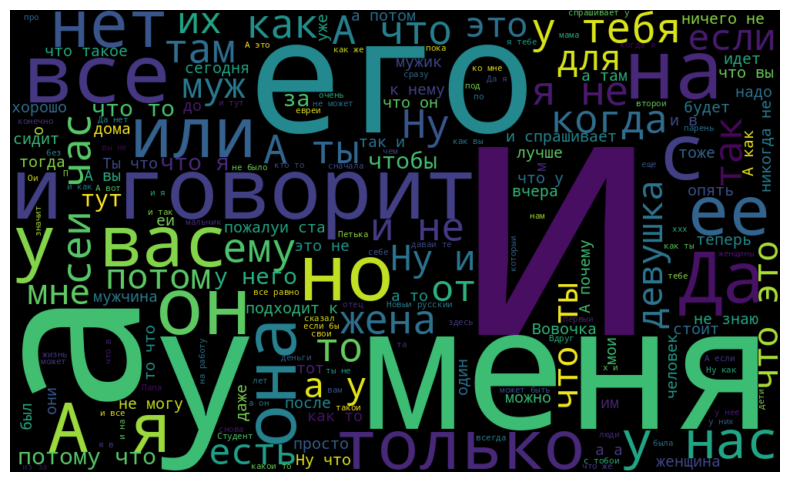

In [27]:
text = ' '.join(df['text'])
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='black',
    max_words=200,
    collocations=True
).generate(text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Задача нумеро дос


In [48]:
! python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 52.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
from pymystem3 import Mystem
from tqdm import tqdm

In [8]:
stop_words = set(stopwords.words('russian'))
# используем функцию для очистки текста из предыдущего задания№1
def clean_func(text):
  clean_text = re.sub(r"<.*?>", "", text)
  clean_text = re.sub(r"[^\w\s-]", "", clean_text)
  clean_text = re.sub(r"[a-z]", "", clean_text)
  clean_text = re.sub(r"\s+", " ", clean_text)
  clean_text = re.sub(r"-", " ", clean_text)
  clean_text = clean_text.lower()
  return clean_text

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens



def lemmatize_text(df, model_name="ru_core_news_sm"):
    text = 'br'.join(df['clean_text'])
    nlp = spacy.load(model_name)
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

    return "br".join(lemmas)


def lemmatize(texts):
    m = Mystem()
    merged_text = "|".join(texts)
    doc = []
    res = []
    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

# Функция для поиска N-грамм
def get_top_ngrams(text, n=2, top=20):
    tokens = preprocess_text(text)
    n_grams = ngrams(tokens, n)
    return Counter(n_grams).most_common(top)

In [9]:
text = clean_func(text)

In [30]:
frac1 = get_top_ngrams(text, n = 1)
frac2 = get_top_ngrams(text, n = 2)
frac3 = get_top_ngrams(text, n = 3)


In [31]:
X1 = [" ".join(x[0]) for x in frac1]
Y1 = [x[1] for x in frac1]

X2 = [" ".join(x[0]) for x in frac2]
Y2 = [x[1] for x in frac2]

X3 = [" ".join(x[0]) for x in frac3]
Y3 = [x[1] for x in frac3]

# X1 = [x[0] for x in frac1]
# Y1 = [x[1] for x in frac1]

# X2 = [x[0] for x in frac2]
# Y2 = [x[1] for x in frac2]

# X3 = [x[0] for x in frac3]
# Y3 = [x[1] for x in frac3]

In [ ]:
X1[0]

'это'

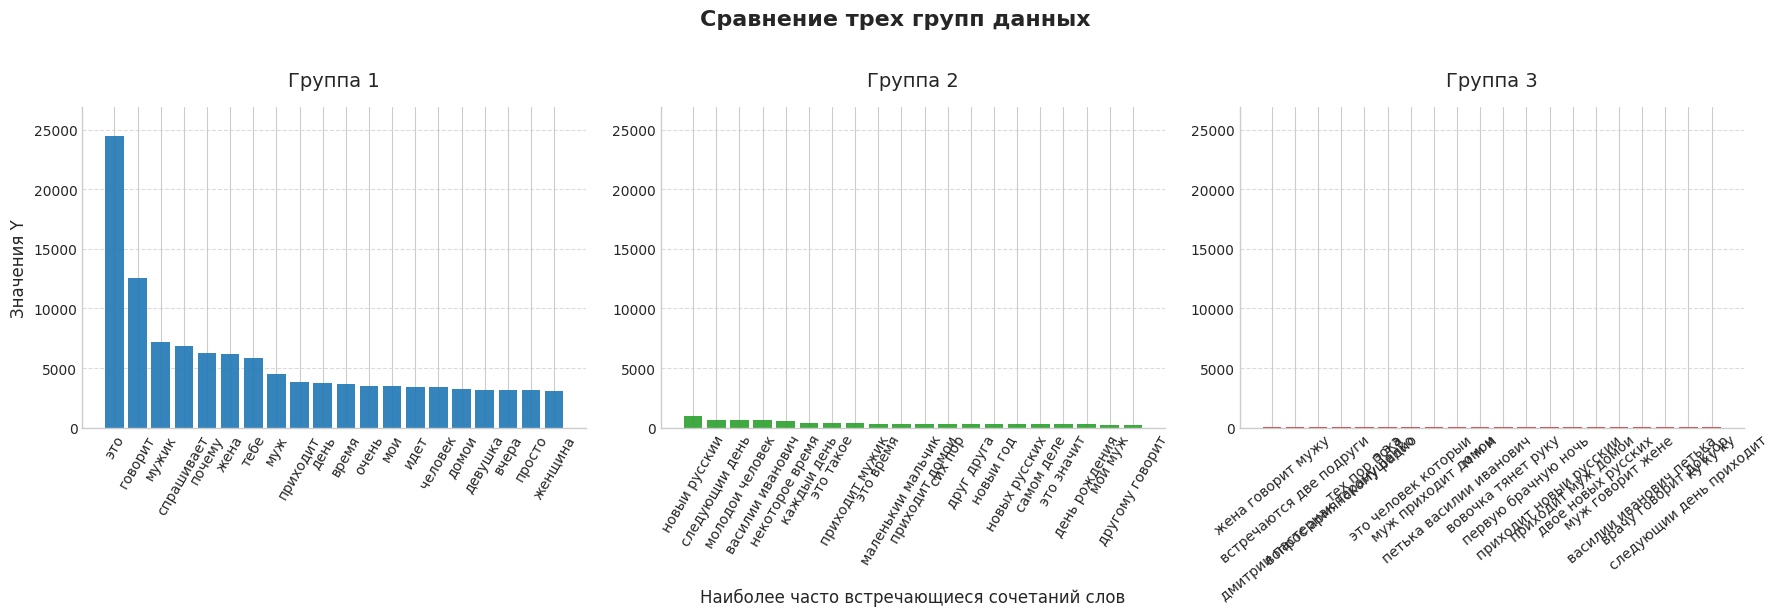

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Настройка общего стиля
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'

# Первый график
ax1.bar(X1, Y1, color='#1f77b4', alpha=0.9)
ax1.set_title('Группа 1', fontsize=14, pad=15)
ax1.set_ylabel('Значения Y', fontsize=12)
ax1.tick_params(axis='x', rotation=60)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Второй график
ax2.bar(X2, Y2, color='#2ca02c', alpha=0.9)
ax2.set_title('Группа 2', fontsize=14, pad=15)
ax2.set_xlabel('Наиболее часто встречающиеся сочетаний слов', fontsize=12, labelpad=15)
ax2.tick_params(axis='x', rotation=60)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Третий график
ax3.bar(X3, Y3, color='#d62728', alpha=0.9)
ax3.set_title('Группа 3', fontsize=14, pad=15)
ax3.tick_params(axis='x', rotation=40)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Общие настройки
fig.suptitle('Сравнение трех групп данных',
            fontsize=16, y=1.02, fontweight='bold')

# Выравнивание осей Y
max_y = max(max(Y1), max(Y2), max(Y3))
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(0, max_y*1.1)
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

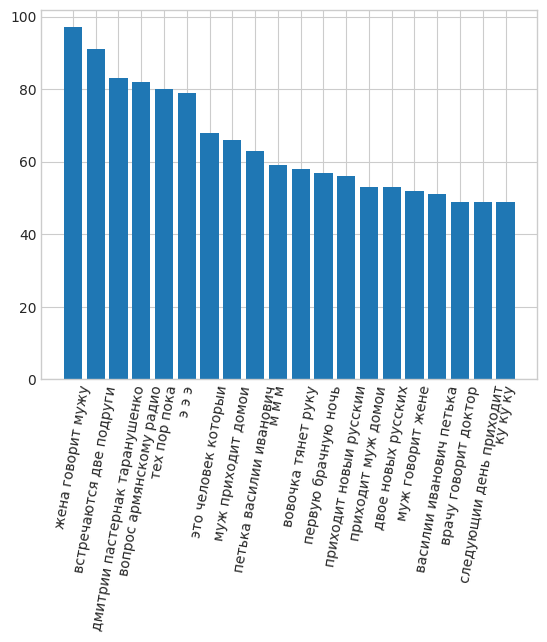

In [33]:
plt.bar(X3, Y3)
plt.tick_params(axis='x', rotation=80)
plt.show()

Перейдём к пункту терс

In [34]:
two_texts = [' '.join(df['text'][:10]), ' '.join(df['text'][10:20])]
two_clean_texts = [clean_func(text) for text in two_texts]

Было интересно, на первых 20 текстах что покажет tf-idf

In [35]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(two_clean_texts)


feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]


sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]
print("Ключевые слова:", sorted_keywords)

Ключевые слова: ['на', 'судья', 'что', 'он', 'вы', 'сказал', 'этот', 'тут', 'суде', 'правда', 'его', 'было', 'правду', 'это', 'так', 'обвиняемыи', 'мы', 'как', 'за', 'да', 'чистая', 'руках', 'прямо', 'однои', 'ну', 'когда', 'из', 'же', 'дело', 'вправо', 'влево', 'был', 'автомобиль', 'только', 'сказать', 'раз', 'день', 'гражданин', 'вас', 'чистил', 'четырех', 'четвертыи', 'черт', 'ходить', 'утверждать', 'уровне', 'упал', 'ужасно', 'угла', 'убежали', 'убежавших', 'тюрьмы', 'тюрьме', 'ты', 'третии', 'тогда', 'то', 'тип', 'таком', 'таких', 'схватил', 'судебном', 'столкновения', 'стои', 'стены', 'старую', 'стамбуле', 'спрашивают', 'спрашивает', 'согласно', 'случаи', 'случае', 'сидим', 'сидел', 'свои', 'сбил', 'рукои', 'руками', 'расстроен', 'рассматриваем', 'расскажите', 'раза', 'противника', 'происходила', 'произошло', 'продолжаете', 'при', 'предупреждает', 'правды', 'поскользнулся', 'подсудимому', 'подряд', 'подошел', 'подери', 'побоялся', 'перестаньте', 'палка', 'острыи', 'остановилась',

Задача куатро

In [14]:
df['clean_text'] = df['text'].apply(clean_func)



In [ ]:
df['lemm'] = lemmatize(df['clean_text'])

In [ ]:
df.to_csv()

Длина текста до лемматизации

In [37]:
len(text)

21343461

Сначала на словах

In [46]:
from sklearn.preprocessing import LabelEncoder
# т.к. target по сути это не №, то используем:\
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["theme"][:4000])
class_names = label_encoder.classes_

In [48]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text'][:4000])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
classification_report = classification_report(y_test, y_pred)
print('\n', classification_report)


 Accuracy:  0.31875

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        43
           2       0.21      0.76      0.32        51
           3       0.20      0.45      0.28        64
           4       0.00      0.00      0.00        11
           5       0.17      0.74      0.28        57
           6       0.00      0.00      0.00         7
           7       1.00      0.20      0.33        30
           8       0.00      0.00      0.00         6
           9       1.00      0.04      0.08        23
          10       0.87      0.39      0.54        33
          12       0.93      0.27      0.41        49
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00        22
          16       0.00      0.00      0.00         5
          17       0.60      0.09      0.15        35
    

А теперь на кусках слов

In [1]:
! python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 91.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
nlp = spacy.load("ru_core_news_sm")

In [23]:
def lemmatize(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130204 entries, 0 to 130203
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   theme       130204 non-null  object
 1   text        130204 non-null  object
 2   rating      130204 non-null  int64 
 3   clean_text  130204 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB


In [38]:
df_copy = df[:4000].copy()

In [39]:
text_ = "|".join(df_copy['clean_text'])
lem = lemmatize(text_)
lem

'на суд в стамбул обвиняемыи сказать на свой жертва я нападать всегда день ночь я бы побояться ходить с награбленными деньга | вы продолжать утверждать что обвиняемыи назвать вас дурак да гражданин судья правда он это сказать не прямо а иносказательно он сказать что касаться интеллект то мы с вами на одном уровень |на суд итак когда дело дойти до столкновение у ваш противник в рука быть палка а что было у вас в рука его жена |старую леди сбить автомобиль на суд ее спрашивать как было дело она из за угол вывернуть автомобиль я влево и он влево я вправо и он вправо тут водитель кричать да стои ты на место чёрт подери я остановиться тут он на меня и наехать |судья говорить согласно вашеи жалоба обвиняемыи сказать что вы дурак чистый правда чистый правда тогда на что же вы жаловаться |на судебный заседание гражданка дроздов мы рассматривать ваш иск к гражданин берёзкин говорите суд весь правда только правда предупреждать судья это в мой интерес гражданин судья клясться когда быть этот случ

In [40]:
df_copy['lem'] = lem.split("|")

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   theme       4000 non-null   object
 1   text        4000 non-null   object
 2   rating      4000 non-null   int64 
 3   clean_text  4000 non-null   object
 4   lem         4000 non-null   object
dtypes: int64(1), object(4)
memory usage: 156.4+ KB


In [63]:
from sklearn.preprocessing import LabelEncoder
# т.к. target по сути это не №, то используем:\
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["theme"][:4000])
class_names = label_encoder.classes_

In [66]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_copy['lem'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))



 Accuracy:  0.38125


Без лемматизации  Accuracy:  0.31875

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130204 entries, 0 to 130203
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   theme       130204 non-null  object
 1   text        130204 non-null  object
 2   rating      130204 non-null  int64 
 3   clean_text  130204 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB


In [101]:
print(df['text'][10238])

- Ты никогда не бывал в Самаре?- Нет, никогда.- Тогда ты должен знать мою сестру, она тоже никогда там не бывала!

